## PCA on Images-I

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
oliv = datasets.fetch_olivetti_faces()

In [5]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [6]:
oliv['data'].shape

(400, 4096)

In [7]:
oliv['images'].shape

(400, 64, 64)

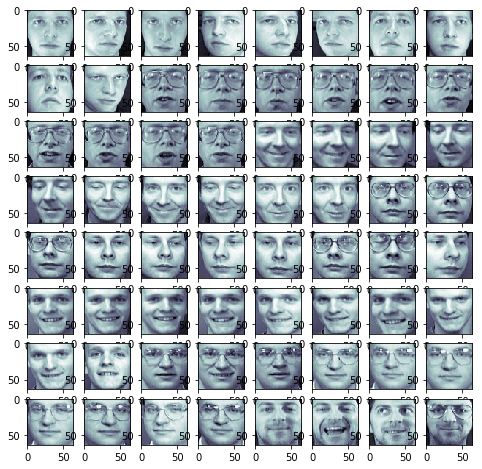

In [9]:
# Draw images
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(oliv.images[i], cmap=plt.cm.bone)
plt.show()

In [10]:
# PCA
x = oliv.data
y = oliv.target

In [11]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.components_.shape

(400, 4096)

In [16]:
# Best K
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.95:
    currentSum += pca.explained_variance_[k]
    k += 1
k

123

In [18]:
pca = PCA(n_components=k, whiten=True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

## Reproducing Images 

In [19]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [20]:
# Plotting reproduced images
x_approx_images = x_approx.reshape((400, 64, 64))

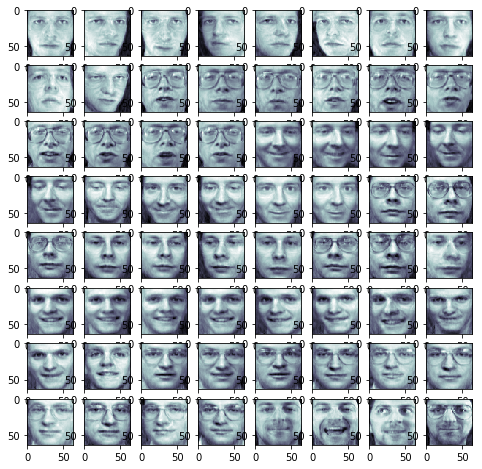

In [21]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(x_approx_images[i], cmap=plt.cm.bone)
plt.show()